In [2]:
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.python import debug as tf_debug

hello = tf.constant('Hello, TensorFlow!')

sess = tf.Session()
#将sess封装成具有tfdbg功能的Session
#sess = tf_debug.LocalCLIDebugWrapperSession(sess)
print(sess.run(hello))
sess.close()

F:\Users\lizeda\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


b'Hello, TensorFlow!'


In [3]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from initializations import random_mini_batches
from dnn_app_utils_v2 import load_data, predict, print_mislabeled_images
from __future__ import division, print_function, absolute_import

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [5]:
# GRADED FUNCTION: one_hot_matrix

def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """

    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    C = tf.constant(C,name='C')
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(labels,C,axis=0)
    # Create the session (approx. 1 line)
    sess = tf.Session()
    # Run the session (approx. 1 line)
    one_hot = sess.run(one_hot_matrix)
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    return one_hot

## CWUR BEARING DATA

In [6]:
filepath = r"F:\work files\The way to data science\Python for Data Science\De.npy"
filepath2 = r"F:\work files\The way to data science\Python for Data Science\data_ft.npy"
filepath3 = r"F:\work files\The way to data science\Python for Data Science\De_no28.npy"

In [7]:
De_orig = np.load(filepath3)
De_features = np.load(filepath2)

Input data was raw data points in time domain

In [8]:
# The number of samples
signals_num = []
new_signals = []
labels_num = [40,40,77,4]
labels = []
for i in range(De_orig.shape[0]-1):
    signal_length = De_orig[i].shape[0]
    signals_num.append(signal_length//2048)
    for _ in range(signals_num[-1]+1):
        j = np.random.choice(signal_length-2048)
        new_signals.append(De_orig[i][j:j+2048])
        labels.append(De_orig[-1][i])
#         if i < 40:
#             labels.append(0)
#         elif 40 <= i < 80:
#             labels.append(1)
#         elif 80 <= i < 157:
#             labels.append(2)
#         elif i >= 157:
#             labels.append(3)

In [9]:
new_signals = np.squeeze(np.array(new_signals))
labels = np.array(labels)
new_signals.shape, len(labels)

((17127, 2048), 17127)

In [10]:
data_X = preprocessing.scale(new_signals)
data_Y = labels

Divide the data into train set and validation set

In [11]:
train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.2, random_state=244)

In [12]:
print(train_y.shape, test_y.shape)
test_y[15:30]

(13701,) (3426,)


array([8, 4, 6, 0, 0, 1, 8, 0, 8, 0, 2, 5, 7, 8, 8])

In [13]:
#labels = np.array([1,2,3,0,2,1])
train_y = one_hot_matrix(train_y, C = 10)
test_y = one_hot_matrix(test_y, C = 10)
print ("one_hot = " + str(test_y))

one_hot = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("train_y's shape: " + str(train_y.shape))
print ("test_y's shape: " + str(test_y.shape))

train_x's shape: (13701, 2048)
test_x's shape: (3426, 2048)
train_y's shape: (10, 13701)
test_y's shape: (10, 3426)


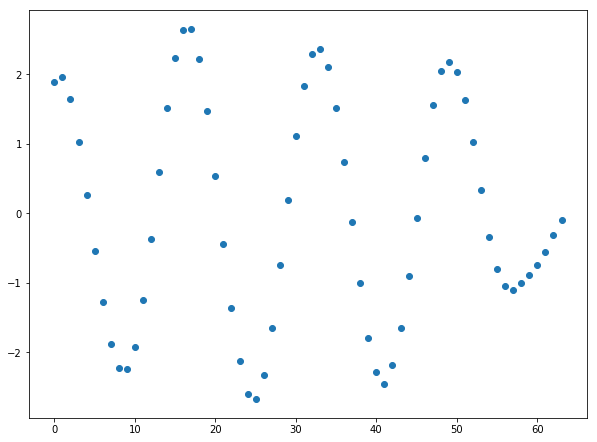

In [14]:
plt.figure(figsize=(10,7.5))
plt.scatter(list(range(64)), train_x[1][:64])
plt.show()

In [16]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True) 

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


(784, 1024) (10, 1024) (784, 300) (10, 300)
(55000, 784)
(55000, 10)


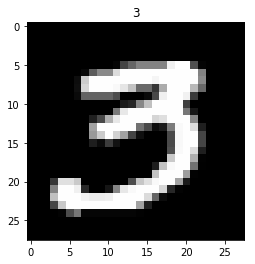

In [17]:
test_x = mnist.test.images.T[:, :300]
test_y = mnist.test.labels.T[:, :300]

train_x = mnist.train.images.T[:, :1024]
train_y = mnist.train.labels.T[:, :1024]
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
# plot one example
print(mnist.train.images.shape)     # (55000, 28 * 28)
print(mnist.train.labels.shape)     # (55000, 10)
plt.imshow(train_x[:,511].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(train_y[:,511]))
plt.show()

## Model

In [15]:
class autoencoder():
    
    #L = len(layer_dims)            # number of layers in the network
    #n_x, n_y = data_x.shape[0], data_y.shape[0]
        
    def __init__(self, isautoencoder = True):# layer_dims, learning_rate, training_epochs, batch_size, display_step, lambd, pool_f
        self.autoencoder = isautoencoder
        
    def create_placeholders(self, n_x, n_y):
        """
        Creates the placeholders for the tensorflow session.

        Arguments:
        n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
        n_y -- scalar, number of classes (from 0 to 5, so -> 6)

        Returns:
        X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
        Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"

        Tips:
        - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
          In fact, the number of examples during test/train is different.
        """
        
        X = tf.placeholder(shape=[n_x, None],dtype='float')
        Y = tf.placeholder(shape=[n_y, None],dtype='float')
        
        return X, Y
    
    def initialize_parameters_deep(self, layer_dims, lambd, initialize_type="Xavier", pretrain = True, pythondict = None):
        """
        Arguments:
        layer_dims -- python array (list) containing the dimensions of each layer in our network

        Returns:
        parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                        Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                        bl -- bias vector of shape (layer_dims[l], 1)
        """

        #np.random.seed(1)
        parameters = {}
        L = len(layer_dims)            # number of layers in the network
        
        ininum = 2 if initialize_type == "He" else 1
        if pretrain:
            for l in range(1, L):
                name = 'W' + str(l)
                #print(name)
                var = tf.Variable(tf.random_normal((layer_dims[l], layer_dims[l-1])) * np.sqrt(ininum/layer_dims[l-1]),
                                                  name=name) #, dtype=tf.float32
                tf.add_to_collection('ae_losses', tf.contrib.layers.l2_regularizer(lambd)(var))
                if l <= L//2 :
                    tf.add_to_collection('soft_losses', tf.contrib.layers.l2_regularizer(lambd)(var))
                parameters[name] = var
                parameters['b' + str(l)] = tf.Variable(tf.zeros((layer_dims[l], 1)))# np.zeros((layer_dims[l], 1))

                assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
                assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        else:
            for l in range(1, L-1):
                name = 'W' + str(l)
                var = tf.Variable(pythondict[name], name=name)#tf.convert_to_tensor(pythondict["W" + str(l)])
                tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(lambd)(var))
                parameters[name] = var
                parameters["b" + str(l)] = tf.Variable(pythondict["b" + str(l)], name="b" + str(l))#tf.convert_to_tensor(pythondict["b" + str(l)])
                assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
                assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
            l = l+1
            name = 'W' + str(l)
            var = tf.Variable(tf.random_normal((layer_dims[l], layer_dims[l-1])) * np.sqrt(ininum/layer_dims[l-1]),
                                              name=name) #, dtype=tf.float32
            tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(lambd)(var))  
            parameters[name] = var
            parameters['b' + str(l)] = tf.Variable(tf.zeros((layer_dims[l], 1)))
        print(parameters.keys())
        return parameters
    
    def encoder(self, X, parameters, n_e, middle):
        """
        Forward propagation part 1 -- compute the encoder output
        Arguments:
        X -- the input data of shape (the number of input units, the number of samples)
        parameters -- a dict contains "W1","b1"..."WL","bL"
        n_e -- the number of units in the last encoder layer
        pretain -- True or False
        """
        A = X

        for l in range(1, middle+1):
            A_prev = A
            A = tf.nn.relu(tf.add(tf.matmul(parameters['W' + str(l)], A_prev), parameters['b' + str(l)]))
        print(A.shape)
        
        assert(A.get_shape().as_list()[0] == n_e)
        
        return A
    
    def decoder(self, encoder_A, parameters, n_x, middle):
        """
        Forward propagation part 1 -- compute the encoder output
        Arguments:
        encoder_A -- the output of the encoder part
        parameters -- a dict contains "W1","b1"..."WL","bL"
        n_x -- the number of input units
        pretain -- True or False
        """
        A = encoder_A
        L = len(parameters) // 2

        for l in range(middle+1, L+1):
            A_prev = A
            A = tf.nn.relu(tf.add(tf.matmul(parameters['W' + str(l)], A_prev), parameters['b' + str(l)]))
        print(A.shape)
        print(A.get_shape().as_list()[0], n_x)
        assert(A.get_shape().as_list()[0] == n_x)
        
        return A
    
    def softmax(self, encoder_A, parameters):
        """
        Compute the linear logits
        """
        logits = tf.add(tf.matmul(parameters["softmaxW"], encoder_A), parameters["softmaxb"])

        return logits
    
    def compute_softmax_loss(self, A, Y, lambd=None):
        """
        Computes the softmax loss
        Arguments:
        A -- output of forward propagation (output of the last unit), of shape (10, number of examples)
        Y -- "true" labels vector placeholder, same shape as A

        Returns:
        cost - Tensor of the cost function
        """

        # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
        logits = tf.transpose(A)
        labels = tf.transpose(Y)

        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = labels))
        tf.add_to_collection('soft_losses', cost)
        if lambd:
            print(tf.get_collection('soft_losses'))
            L2cost = tf.add_n(tf.get_collection('soft_losses'))
            return L2cost
        else:
            return cost
    
    def compute_cost(self, A, Y, lambd=None):
        """
        Computes the cost

        Arguments:
        A -- output of forward propagation (output of the last unit), of shape (10, number of examples)
        Y -- "true" labels vector placeholder, same shape as A

        Returns:
        cost - Tensor of the cost function
        """
        
        cost = tf.reduce_mean(tf.pow(A - Y, 2))
        tf.add_to_collection('ae_losses', cost) # 将均方误差损失函数加入损失集合
        # get_collection()返回一个列表，这个列表是所有这个集合中的元素，在本样例中这些元素就是损失函数的不同部分，将他们加起来就是最终的损失函数
        if lambd:
            print(tf.get_collection("ae_losses"))
            L2cost = tf.add_n(tf.get_collection('ae_losses'))
            return L2cost
        else:
            return cost
        
    def pooling(self, x, f, mode = "max"):
        # Max pooling 
        print(x.shape)
        assert(x.shape[0] % f == 0)
        pool_size = int(x.shape[0]/f)

        pooled_x = np.zeros((pool_size, x.shape[1]))

        for i in range(pool_size):
            p_l = i * f
            p_r = p_l + f

            pooled_x[i, :] = np.max(x[p_l:p_r, :], axis=0) if mode == "max" else np.mean(x[p_l:p_r, :], axis=0)
        print(pooled_x.shape)
        return pooled_x
    
    def py2tensor(self, pythondict, parameters):
        """
        Convert python data type into tensor
        """
        L = len(pythondict)//2
        for l in range(1, L+1):
            parameters["W" + str(l)] = tf.Variable(pythondict["W" + str(l)], name="W" + str(l))#tf.convert_to_tensor(pythondict["W" + str(l)])
            parameters["b" + str(l)] = tf.Variable(pythondict["b" + str(l)], name="b" + str(l))#tf.convert_to_tensor(pythondict["b" + str(l)])
            
        assert(len(parameters)//2 == int(L+1))
        return parameters
    
    def model(self, train_x, train_Y, test_x, test_Y, layer_dims, learning_rate = 0.075, slearning_rate = 0.003, training_epochs = 1500, 
              batch_size = 64, display_step = 50, lambd = 0.3/256, pool_f = 0, initialize_type="Xavier", mask = False, sflayer = True, 
              print_cost = True):
        
        ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
        tf.set_random_seed(1)                             # to keep consistent results
        seed = 3                                          # to keep consistent results
        if pool_f != 0:
            # Max-Pooling the input data
            train_x = self.pooling(train_x, pool_f, "max")
            test_x = self.pooling(test_x, pool_f, "max")
        train_y, test_y = train_Y, test_Y
            
        (n_x, m) = train_x.shape                          # (n_x: input size, m : number of examples in the train set)
        n_y = train_y.shape[0]                            # n_y : output size
        middle = len(layer_dims)//2
        n_e = layer_dims[middle]
        
        costs1 = []                                       # To keep track of the cost
        
        # Create Placeholders of shape (n_x, n_y)
        X, Y = self.create_placeholders(n_x, n_y)
        print("X,Y———>", X, Y)
        
        # Initialize parameters
        parameters = self.initialize_parameters_deep(layer_dims, lambd, initialize_type)
        print("parameters———>", parameters)
        
        # Forward propagation: Build the forward propagation in the tensorflow graph
        encoder_op = self.encoder(X, parameters, n_e, middle)
        AL = self.decoder(encoder_op, parameters, n_x, middle)
        print("AL———>", AL)
        
        # Cost function: Add cost function to tensorflow graph
        cost = self.compute_cost(AL, X, lambd)
        
        # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
        optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
        
        #saver = tf.train.Saver()
        with tf.Session() as sess:

            sess.run(tf.global_variables_initializer())
            seed = 10
            
            for epoch in range(training_epochs):
                # Loop over all batches
                epoch_cost = 0                       # Defines a cost related to an epoch
                num_minibatches = int(m / batch_size) # number of minibatches of size minibatch_size in the train set
                seed = seed + 1
                minibatches = random_mini_batches(train_x, train_x, batch_size, seed)

                for minibatch in minibatches:#for i in range(total_batch):
                    
                    (batch_xs, batch_ys) = minibatch #mnist.train.next_batch(batch_size)  # max(x) = 1, min(x) = 0
                    
                    if mask == True:
                        # Mask some input data to improve the robustness
                        D0 = np.random.rand(batch_xs.shape[0], batch_xs.shape[1])               # Step 1: initialize matrix D0 = np.random.rand(..., ...)
                        D0 = D0 < 0.9                                         # Step 2: convert entries of D0 to 0 or 1 (using keep_prob as the threshold)
                        batch_xs = np.multiply(D0, batch_xs)                                    # Step 3: shut down some neurons of batch_xs(X)
                        batch_xs = batch_xs/0.9                                            # Step 4: scale the value of neurons that haven't been shut down
                    
                    # Run optimization op (backprop) and cost op (to get loss value)
                    _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X: batch_xs})
                    epoch_cost += minibatch_cost / num_minibatches
                #print(num_minibatches, m, batch_size, minibatch_cost, epoch_cost)
                # Display logs per epoch step
                costs1.append(epoch_cost)
                if epoch % display_step == 0 and print_cost == True:
                    print("Epoch:", '%04d' % (epoch), "cost=", "{:.9f}".format(epoch_cost))
                
            print("Optimization Part1 Finished!")
            
            # plot the cost
            plt.figure(figsize=(10,7.5))
            plt.plot(np.squeeze(costs1))
            plt.ylabel('cost1')
            plt.xlabel('epoches (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()
            
            print(sess.run(parameters["b1"]))
#             encode_decode = sess.run(AL, feed_dict={X: test_x})
#             f, a = plt.subplots(2, 10, figsize=(20, 5))
#             for i in range(10):
#                 a[0][i].imshow(np.reshape(test_x[:, i], (28, 28)))
#                 a[1][i].imshow(np.reshape(encode_decode[:, i], (28, 28)))
#             plt.show()
            # lets save the parameters in a variable
            #parameters = sess.run(parameters)
#             print(tf.get_default_graph())
#             print(parameters)
#             print ("Parameters have been trained!")
#             L = len(layer_dims)
#             ae_parameters = {}
#             if self.autoencoder:
#                 print("Output AE parameters!")
#                 for l in range(1, (L-1)//2+1):
#                     ae_parameters['W' + str(l)] = parameters['W' + str(l)]
#                     ae_parameters['b' + str(l)] = parameters['b' + str(l)]
#                 print(ae_parameters)
#                 return ae_parameters, (train_x, train_Y, test_x, test_Y)
#             else:
#                 return parameters, (train_x, train_Y, test_x, test_Y)
        
        print("Start to train softmax layer...")
        costs2 = []

        name = 'softmaxW' 
        var = tf.Variable(tf.random_normal((n_y, n_e)) * np.sqrt(1/n_e),name=name) #, dtype=tf.float32
        print(name, var.shape.as_list())
        print(tf.get_collection("soft_losses"))
        tf.add_to_collection('soft_losses', tf.contrib.layers.l2_regularizer(lambd)(var))
        parameters[name] = var
        parameters['softmaxb'] = tf.Variable(tf.zeros((n_y, 1)))
        print(parameters.keys())
                          
        # Compute the linear logits 
        AL = self.softmax(self.encoder(X, parameters, n_e, middle), parameters)
        
        # Cost function: Add cost function to tensorflow graph
        loss = self.compute_softmax_loss(AL, Y, lambd)
        
        # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
        soft_optimizer = tf.train.AdamOptimizer(learning_rate = slearning_rate).minimize(loss)
        
        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(AL), tf.argmax(Y))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            
            print(sess.run(parameters["b1"]))
            seed = 10
            print(tf.get_default_graph())
            for epoch in range(200):
                # Loop over all batches
                epoch_cost = 0.                       # Defines a cost related to an epoch
                num_minibatches = int(m / batch_size) # number of minibatches of size minibatch_size in the train set
                seed = seed + 1
                minibatches = random_mini_batches(train_x, train_y, batch_size, seed)
                if epoch == 0:
                    print(sess.run(parameters["b1"]))
                for minibatch in minibatches:#for i in range(total_batch):
                    (batch_xs, batch_ys) = minibatch
                    _, loss_ = sess.run([soft_optimizer, loss], feed_dict={X: batch_xs, Y: batch_ys})
                    epoch_cost += loss_ / num_minibatches
                    
                costs2.append(epoch_cost)
#                 if epoch_cost < 0.01:
#                     print(epoch_cost)
#                     break
                if epoch % 10 == 0 and print_cost == True:

                    print("Epoch:", '%04d' % (epoch), "loss=", "{:.9f}".format(epoch_cost),
                          "Train Accuracy:", "{:.8f}".format(accuracy.eval({X: train_x, Y: train_y})),
                          "Test Accuracy:", "{:.4f}".format(accuracy.eval({X: test_x, Y: test_y})))

            print("Optimization Part2 Finished!")

            # plot the cost
            plt.figure(figsize=(10,7.5))
            plt.plot(np.squeeze(costs2))
            plt.ylabel('cost2')
            plt.xlabel('epoches (per tens)')
            plt.title("Learning rate =" + str(slearning_rate))
            plt.show()

            print ("Train Accuracy:", accuracy.eval({X: train_x, Y: train_y}))
            print ("Test Accuracy:", accuracy.eval({X: test_x, Y: test_y}))
            
            return parameters

print("ok")

ok


In [15]:
train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.2, random_state=244)
train_y = one_hot_matrix(train_y, C = 10)
test_y = one_hot_matrix(test_y, C = 10)
train_x = train_x.T
test_x = test_x.T
train_y = train_y
test_y = test_y
print(train_x.shape,train_y.shape)

(2048, 13701) (10, 13701)


In [16]:
train_x = train_x.T
test_x = test_x.T

In [17]:
ae = autoencoder()

(2048, 13701)
(512, 13701)
(2048, 3426)
(512, 3426)
X,Y———> Tensor("Placeholder:0", shape=(512, ?), dtype=float32) Tensor("Placeholder_1:0", shape=(10, ?), dtype=float32)
dict_keys(['W2', 'W3', 'b4', 'W1', 'b2', 'b1', 'W4', 'b3'])
parameters———> {'W2': <tf.Variable 'W2:0' shape=(64, 256) dtype=float32_ref>, 'W3': <tf.Variable 'W3:0' shape=(256, 64) dtype=float32_ref>, 'b4': <tf.Variable 'Variable_3:0' shape=(512, 1) dtype=float32_ref>, 'W1': <tf.Variable 'W1:0' shape=(256, 512) dtype=float32_ref>, 'b2': <tf.Variable 'Variable_1:0' shape=(64, 1) dtype=float32_ref>, 'b1': <tf.Variable 'Variable:0' shape=(256, 1) dtype=float32_ref>, 'W4': <tf.Variable 'W4:0' shape=(512, 256) dtype=float32_ref>, 'b3': <tf.Variable 'Variable_2:0' shape=(256, 1) dtype=float32_ref>}
(64, ?)
(512, ?)
512 512
AL———> Tensor("Relu_3:0", shape=(512, ?), dtype=float32)
[<tf.Tensor 'l2_regularizer:0' shape=() dtype=float32>, <tf.Tensor 'l2_regularizer_2:0' shape=() dtype=float32>, <tf.Tensor 'l2_regularizer_4:0' sha

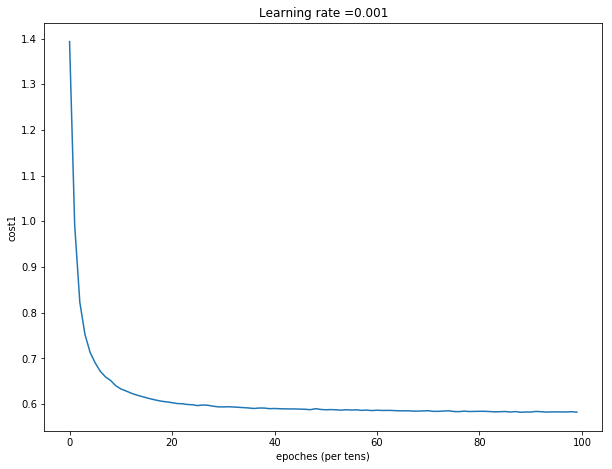

[[ 0.29702196]
 [ 0.33787853]
 [ 0.33551225]
 [ 0.32691967]
 [ 0.37200937]
 [ 0.30313516]
 [ 0.37274256]
 [ 0.42155564]
 [ 0.08182504]
 [ 0.4079549 ]
 [ 0.3891911 ]
 [ 0.36156288]
 [ 0.39914984]
 [ 0.36025834]
 [ 0.01747302]
 [ 0.00278749]
 [ 0.36562243]
 [ 0.37110284]
 [ 0.31034198]
 [ 0.3887912 ]
 [ 0.34699264]
 [ 0.05809283]
 [ 0.3993965 ]
 [ 0.342392  ]
 [ 0.3351371 ]
 [ 0.38420412]
 [ 0.40763605]
 [ 0.3217136 ]
 [ 0.38362607]
 [ 0.2818158 ]
 [ 0.33364797]
 [ 0.3832334 ]
 [ 0.37799448]
 [ 0.41185144]
 [ 0.33819082]
 [ 0.38199133]
 [ 0.3462883 ]
 [ 0.30263737]
 [ 0.368763  ]
 [ 0.32038254]
 [ 0.34947237]
 [ 0.31446785]
 [ 0.46552393]
 [ 0.346052  ]
 [ 0.3571068 ]
 [ 0.37177083]
 [ 0.39817658]
 [ 0.03681106]
 [ 0.3049631 ]
 [ 0.37532225]
 [ 0.38258234]
 [ 0.43325594]
 [ 0.40198687]
 [ 0.37551156]
 [ 0.3841218 ]
 [ 0.37174368]
 [ 0.061565  ]
 [ 0.3331265 ]
 [ 0.41334608]
 [ 0.33185136]
 [ 0.37724972]
 [ 0.34460965]
 [ 0.369011  ]
 [ 0.3521585 ]
 [ 0.35910887]
 [ 0.42411533]
 [ 0.33567

Epoch: 0100 loss= 0.347313094 Train Accuracy: 0.99094957 Test Accuracy: 0.8421
Epoch: 0110 loss= 0.221120293 Train Accuracy: 1.00000000 Test Accuracy: 0.8529
Epoch: 0120 loss= 0.360252466 Train Accuracy: 0.98883295 Test Accuracy: 0.8368
Epoch: 0130 loss= 0.228560367 Train Accuracy: 0.99992698 Test Accuracy: 0.8508
Epoch: 0140 loss= 0.383307395 Train Accuracy: 0.98467267 Test Accuracy: 0.8392
Epoch: 0150 loss= 0.223840684 Train Accuracy: 1.00000000 Test Accuracy: 0.8570
Epoch: 0160 loss= 0.207450622 Train Accuracy: 0.99948907 Test Accuracy: 0.8398
Epoch: 0170 loss= 0.239640151 Train Accuracy: 0.99905115 Test Accuracy: 0.8488
Epoch: 0180 loss= 0.321806501 Train Accuracy: 0.99481791 Test Accuracy: 0.8538
Epoch: 0190 loss= 0.209372675 Train Accuracy: 1.00000000 Test Accuracy: 0.8637
Optimization Part2 Finished!


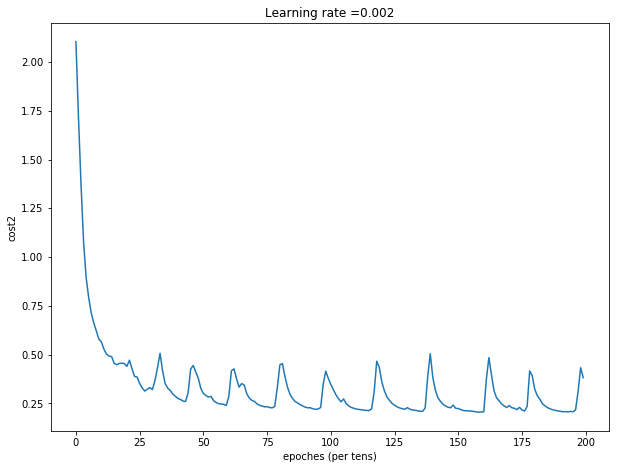

Train Accuracy: 0.9868623
Test Accuracy: 0.83946294


In [25]:
layers = [512, 256, 64, 256, 512]
params = ae.model(train_x, train_y, test_x, test_y, layers, learning_rate=0.001, slearning_rate=0.002, pool_f = 4,training_epochs=100, 
                  display_step=2, batch_size=256)

{'W1': <tf.Variable 'W1:0' shape=(256, 784) dtype=float32_ref>, 'b1': <tf.Variable 'Variable:0' shape=(256, 1) dtype=float32_ref>}
Tensor("Placeholder_4:0", shape=(784, ?), dtype=float32) Tensor("Placeholder_5:0", shape=(10, ?), dtype=float32)
W2 [10, 256]
[<tf.Tensor 'l2_regularizer:0' shape=() dtype=float32>, <tf.Tensor 'l2_regularizer_1:0' shape=() dtype=float32>, <tf.Tensor 'l2_regularizer_2:0' shape=() dtype=float32>]
[<tf.Tensor 'l2_regularizer:0' shape=() dtype=float32>, <tf.Tensor 'l2_regularizer_1:0' shape=() dtype=float32>, <tf.Tensor 'l2_regularizer_2:0' shape=() dtype=float32>, <tf.Tensor 'l2_regularizer_3:0' shape=() dtype=float32>]
dict_keys(['b2', 'W1', 'b1', 'W2'])
(10, ?)
number of losses: 1
Epoch: 0000 loss= 2.316736102 Train Accuracy: 0.4951172 Test Accuracy: 0.50333333
Epoch: 0010 loss= 2.233248517 Train Accuracy: 0.6953125 Test Accuracy: 0.53333336
Epoch: 0020 loss= 2.224946037 Train Accuracy: 0.6376953 Test Accuracy: 0.5133333
Epoch: 0030 loss= 2.232740104 Train A

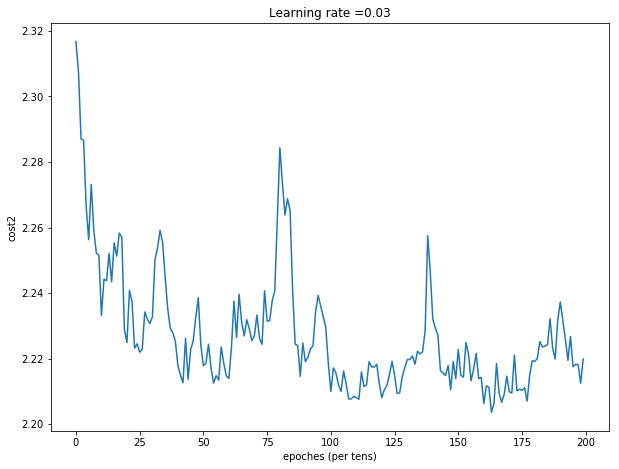

Train Accuracy: 0.6933594
Test Accuracy: 0.5966667


In [42]:
layers = [784, 256, 10]
ae.classifer(data, layers, ae_params)